In [3]:
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.metrics import mean_squared_error, r2_score

# Carregar os conjuntos de dados
california_housing = fetch_california_housing()
diabetes = load_diabetes()

# Dividir os dados em conjuntos de treinamento e teste
X_california_train, X_california_test, y_california_train, y_california_test = train_test_split(
    california_housing.data, california_housing.target, test_size=0.2, random_state=42)

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    diabetes.data, diabetes.target, test_size=0.2, random_state=42)

# Inicializar os regressores de árvore de decisão
tree_regressor = DecisionTreeRegressor()

# Treinar o regressor de árvore de decisão
tree_regressor.fit(X_california_train, y_california_train)

# Fazer previsões com o regressor de árvore de decisão
california_housing_pred_tree = tree_regressor.predict(X_california_test)

# Calcular as métricas de avaliação para o regressor de árvore de decisão
california_housing_rmse_tree = mean_squared_error(y_california_test, california_housing_pred_tree, squared=False)
california_housing_r2_tree = r2_score(y_california_test, california_housing_pred_tree)

# Inicializar os regressores SVM
svm_regressor = SVR()
nu_svm_regressor = NuSVR()

# Treinar os regressores SVM
svm_regressor.fit(X_diabetes_train, y_diabetes_train)
nu_svm_regressor.fit(X_diabetes_train, y_diabetes_train)

# Fazer previsões com os regressores SVM
diabetes_pred_svm = svm_regressor.predict(X_diabetes_test)
diabetes_pred_nu_svm = nu_svm_regressor.predict(X_diabetes_test)

# Calcular as métricas de avaliação para os regressores SVM
diabetes_rmse_svm = mean_squared_error(y_diabetes_test, diabetes_pred_svm, squared=False)
diabetes_r2_svm = r2_score(y_diabetes_test, diabetes_pred_svm)

diabetes_rmse_nu_svm = mean_squared_error(y_diabetes_test, diabetes_pred_nu_svm, squared=False)
diabetes_r2_nu_svm = r2_score(y_diabetes_test, diabetes_pred_nu_svm)

print("Métricas de Avaliação - California Housing Dataset:")
print("Regressão de Árvore de Decisão:")
print("RMSE:", california_housing_rmse_tree)
print("R²:", california_housing_r2_tree)
print("\n")
print("Métricas de Avaliação - Diabetes Dataset:")
print("SVR:")
print("RMSE:", diabetes_rmse_svm)
print("R²:", diabetes_r2_svm)
print("\n")
print("NuSVR:")
print("RMSE:", diabetes_rmse_nu_svm)
print("R²:", diabetes_r2_nu_svm)


Métricas de Avaliação - California Housing Dataset:
Regressão de Árvore de Decisão:
RMSE: 0.7053079531922667
R²: 0.6203785863066531


Métricas de Avaliação - Diabetes Dataset:
SVR:
RMSE: 65.82769899151941
R²: 0.18211365770500287


NuSVR:
RMSE: 66.38047064605368
R²: 0.16831999301920586


/Users/rafael/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/rafael/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/rafael/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes.target[:3]
diabetes.data.shape

(442, 10)

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

X, y = load_iris(as_frame=True, return_X_y=True)
sepal_cols = ["sepal length (cm)", "sepal width (cm)"]
petal_cols = ["petal length (cm)", "petal width (cm)"]

preprocessor = ColumnTransformer(
    [
        ("scaler", StandardScaler(), sepal_cols),
        ("kbin", KBinsDiscretizer(encode="ordinal"), petal_cols),
    ],
    verbose_feature_names_out=False,
).set_output(transform="pandas")

X_out = preprocessor.fit_transform(X)
X_out.sample(n=5, random_state=0)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,-0.052506,-0.592373,3.0,4.0
62,0.189830,-1.973554,2.0,1.0
33,-0.416010,2.630382,0.0,1.0
107,1.765012,-0.362176,4.0,3.0
7,-1.021849,0.788808,1.0,1.0


In [6]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import HistGradientBoostingRegressor

X, y = load_diabetes(return_X_y=True, as_frame=True)

hist_no_interact = HistGradientBoostingRegressor(
    interaction_cst=[[i] for i in range(X.shape[1])], random_state=0
)
hist_no_interact.fit(X, y)

HistGradientBoostingRegressor(interaction_cst=[[0], [1], [2], [3], [4], [5],
                                               [6], [7], [8], [9]],
                              random_state=0)

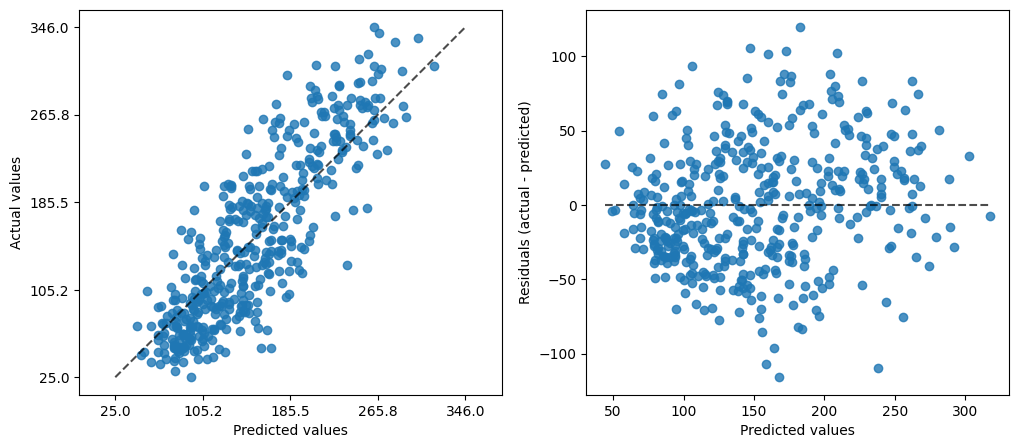

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="actual_vs_predicted", ax=axs[0]
)
_ = PredictionErrorDisplay.from_estimator(
    hist_no_interact, X, y, kind="residual_vs_predicted", ax=axs[1]
)

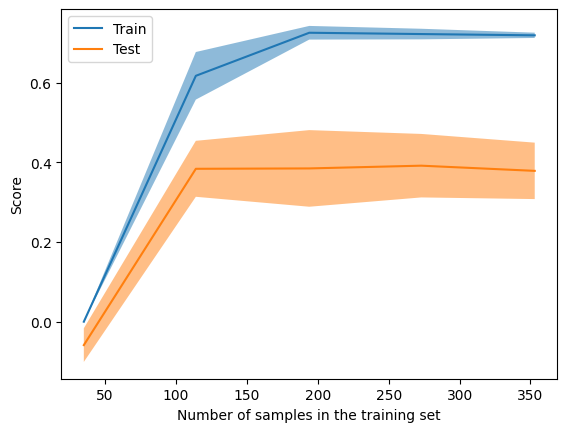

In [8]:
from sklearn.model_selection import LearningCurveDisplay

_ = LearningCurveDisplay.from_estimator(
    hist_no_interact, X, y, cv=5, n_jobs=2, train_sizes=np.linspace(0.1, 1, 5)
)

In [9]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)
X = X.select_dtypes(["number", "category"]).drop(columns=["body"])

In [10]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

categorical_features = ["pclass", "sex", "embarked"]
model = make_pipeline(
    ColumnTransformer(
        transformers=[("cat", OrdinalEncoder(), categorical_features)],
        remainder="passthrough",
    ),
    HistGradientBoostingRegressor(random_state=0),
).fit(X, y)

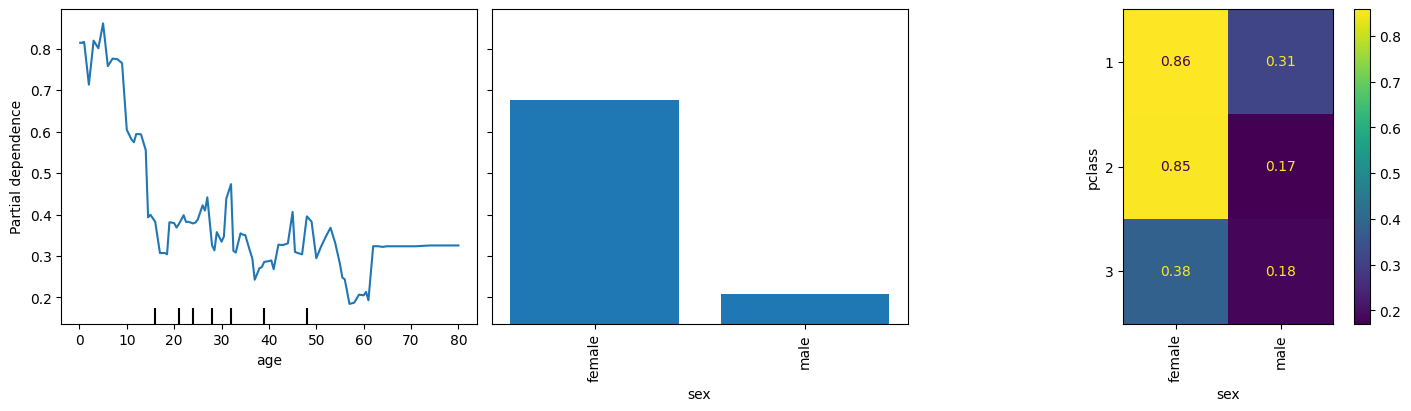

In [11]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(14, 4), constrained_layout=True)
_ = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=["age", "sex", ("pclass", "sex")],
    categorical_features=categorical_features,
    ax=ax,
)